In [186]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def HOG_algorithm(img, cell_size=8, threshold_value = 0.03, algorithm = 1):
  # find gradient and direction for each pixels.
  img = np.float32(img) / 255.0 # normalize the gradient
  sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=7)
  sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=7)
  magnitude_matrix = cv2.magnitude(sobel_x, sobel_y)
  max_magnitude = np.max(magnitude_matrix)
  direction_matrix = np.arctan2(sobel_y, sobel_x)

  # sort the direction into a 6 channel matrix
  H,W = img.shape[0], img.shape[1]
  image_gradient_matrix = np.zeros((H, W, 6))
  image_gradient_matrix_2 = np.zeros((H, W, 6))
  for i in range(H):
    for j in range(W):
      pixel_direction = direction_matrix[i][j] * 180 / np.pi
      if pixel_direction < -15:
        pixel_direction += 180
      elif pixel_direction >= 165:
        pixel_direction -= 180
      if magnitude_matrix[i][j] < max_magnitude * threshold_value:
        magnitude_matrix[i][j] = 0

      # see which range direction belongs
      if pixel_direction >= -15 and pixel_direction < 15:
        image_gradient_matrix[i][j][0] = magnitude_matrix[i][j]
        if magnitude_matrix[i][j] > 0:
          image_gradient_matrix_2[i][j][0] += 1
      elif pixel_direction >= 15 and pixel_direction < 45:
        image_gradient_matrix[i][j][1] = magnitude_matrix[i][j]
        if magnitude_matrix[i][j] > 0:
          image_gradient_matrix_2[i][j][1] += 1
      elif pixel_direction >= 45 and pixel_direction < 75:
        image_gradient_matrix[i][j][2] = magnitude_matrix[i][j]
        if magnitude_matrix[i][j] > 0:
          image_gradient_matrix_2[i][j][2] += 1
      elif pixel_direction >= 75 and pixel_direction < 105:
        image_gradient_matrix[i][j][3] = magnitude_matrix[i][j]
        if magnitude_matrix[i][j] > 0:
          image_gradient_matrix_2[i][j][3] += 1
      elif pixel_direction >= 105 and pixel_direction < 135:
        image_gradient_matrix[i][j][4] = magnitude_matrix[i][j]
        if magnitude_matrix[i][j] > 0:
          image_gradient_matrix_2[i][j][4] += 1
      elif pixel_direction >= 135 and pixel_direction < 165:
        image_gradient_matrix[i][j][5] = magnitude_matrix[i][j]
        if magnitude_matrix[i][j] > 0:
          image_gradient_matrix_2[i][j][5] += 1

  if algorithm == 2:
    image_gradient_matrix = image_gradient_matrix_2
  # resampling every pixel into each cell.
  M, N = H // cell_size, W // cell_size
  cell_matrix = np.zeros((M, N, 6))
  for i in range(M * cell_size):
    for j in range(N * cell_size):
      cell_i, cell_j = i // cell_size, j // cell_size
      for k in range(6):
        cell_matrix[cell_i][cell_j][k] += image_gradient_matrix[i][j][k]
  
  return cell_matrix


In [174]:
def plot_HOG(img, hog, cell_size=8):
  H, W = img.shape[0], img.shape[1]
  M, N = hog.shape[0], hog.shape[1]

  rad_list = [0*np.pi/180, 30*np.pi/180, 60*np.pi/180, 90*np.pi/180, 
              120*np.pi/180, 150*np.pi/180, 180*np.pi/180]

  fig, ax=plt.subplots(figsize=(10, 8))
  X_list = []
  Y_list = []
  U_list = []
  V_list = []
  ax.imshow(img, cmap="gray", interpolation='nearest')
  for k in range(6):
    for i in range(M):
      for j in range(N):
        X_list.append(j*cell_size + cell_size // 2)
        Y_list.append(i*cell_size + cell_size // 2)
        U_list.append(hog[i][j][k] * np.sin(rad_list[k]))
        V_list.append(hog[i][j][k] * np.cos(rad_list[k]))
    ax.quiver(X_list, Y_list, U_list, V_list, color="red", pivot="middle")
  plt.plot()


# Q3.3

Visualizing all three images using both approaches

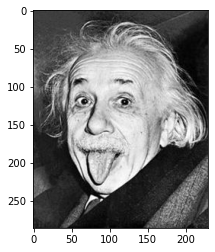

In [175]:
img1 = cv2.imread('/content/drive/MyDrive/1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray')
plt.show()

(35, 28, 6)


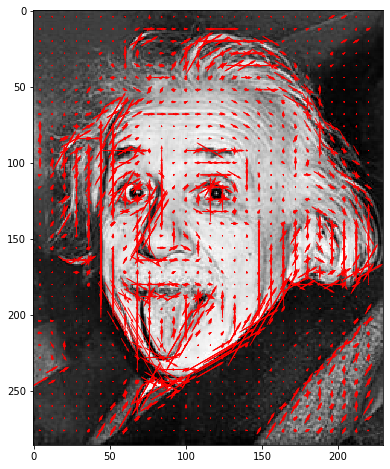

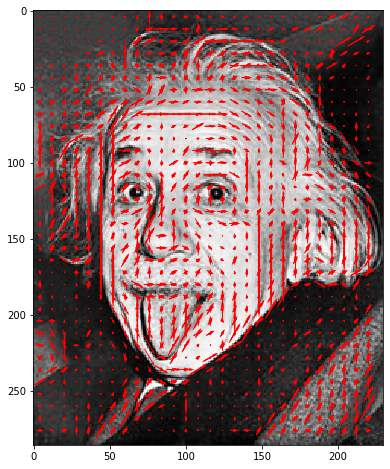

In [176]:
hog1_human = HOG_algorithm(img1)
plot_HOG(img1, hog1_human)
hog2_human = HOG_algorithm(img1, algorithm=2)
print(hog2_human.shape)
plot_HOG(img1, hog2_human)

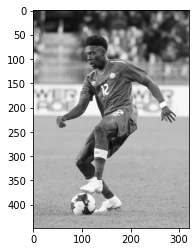

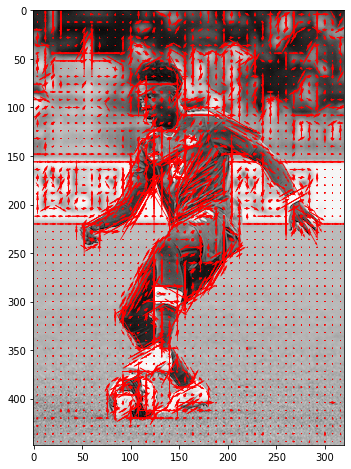

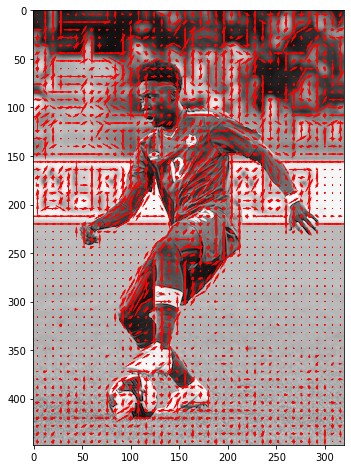

In [177]:
img2 = cv2.imread('/content/drive/MyDrive/2.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.show()
hog1_football = HOG_algorithm(img2)
plot_HOG(img2, hog1_football)
hog2_football = HOG_algorithm(img2, algorithm=2)
plot_HOG(img2, hog2_football)

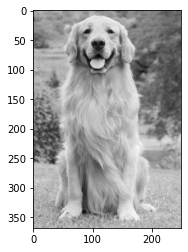

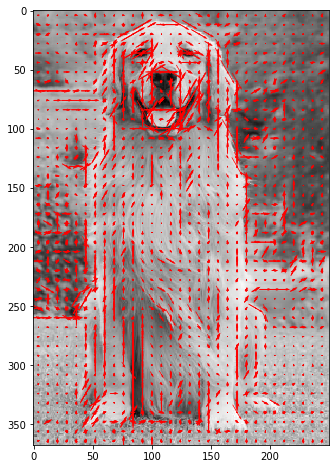

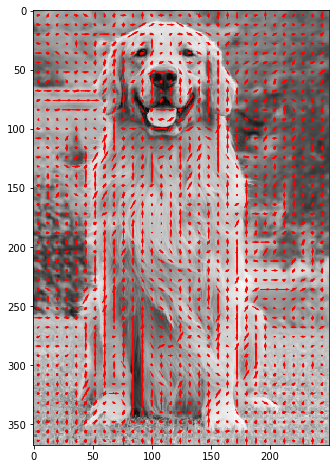

In [178]:
img3 = cv2.imread('/content/drive/MyDrive/3.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img3, cmap='gray')
plt.show()
hog1_dog = HOG_algorithm(img3)
plot_HOG(img3, hog1_dog)
hog2_dog = HOG_algorithm(img3, algorithm=2)
plot_HOG(img3, hog2_dog)

# Q3.4 Normalization

construct the normalize function and save all three images in to txt format.

In [179]:
def normalized_hog(img, hog, e=0.01):
  block_size = 2
  M, N = hog.shape[0], hog.shape[1]
  norm_hog = np.zeros((M, N, block_size**2 * 6))
  for i in range(M - block_size + 1):
    for j in range(N - block_size + 1):
      new_24_channel = np.array([])
      for k in range(block_size):
        for l in range(block_size):
          new_24_channel = np.append(new_24_channel, hog[i+k, j+l])
      new_24_channel /= np.sqrt(np.sum(new_24_channel ** 2) + e ** 2)
      norm_hog[i, j] = new_24_channel
  return norm_hog
  

In [180]:
norm_hog1 = normalized_hog(img1, hog2_human)
np.savetxt('/content/drive/MyDrive/1.txt', norm_hog1.reshape(-1, ))

norm_hog2 = normalized_hog(img2, hog2_football)
np.savetxt('/content/drive/MyDrive/2.txt', norm_hog2.reshape(-1, ))

norm_hog3 = normalized_hog(img3, hog2_dog)
np.savetxt('/content/drive/MyDrive/3.txt', norm_hog3.reshape(-1, ))

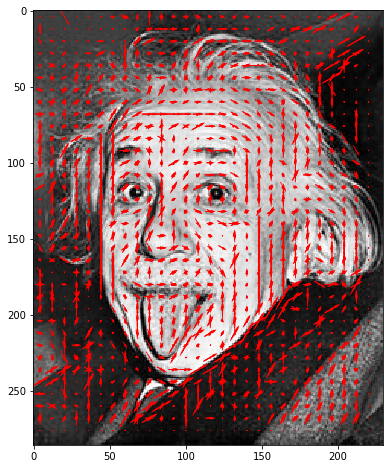

In [181]:
plot_HOG(img1, norm_hog1)

1) compute original Hog + 2) compute normalized Hog of my own image ( without flash + with flash)

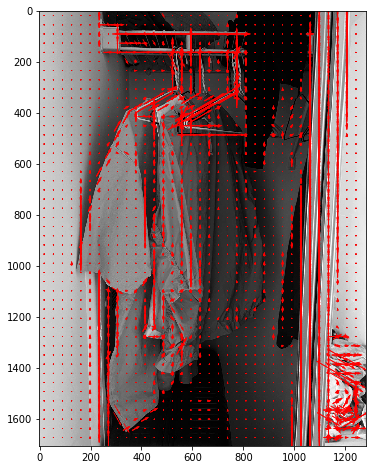

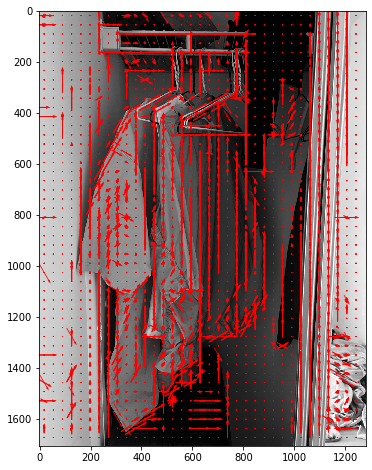

In [184]:
img_chosen = cv2.imread('/content/drive/MyDrive/chosen_img.jpg', cv2.IMREAD_GRAYSCALE)
hog2_chosen = HOG_algorithm(img_chosen, cell_size=36, threshold_value = 0.03, algorithm = 1)
plot_HOG(img_chosen, hog2_chosen, cell_size=36)
norm_hog_chosen = normalized_hog(img_chosen, hog2_chosen)
plot_HOG(img_chosen, norm_hog_chosen, cell_size=36)
np.savetxt('/content/drive/MyDrive/chosen_img.txt', norm_hog_chosen.reshape(-1, ))

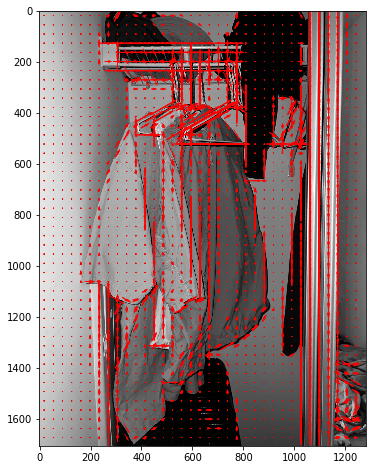

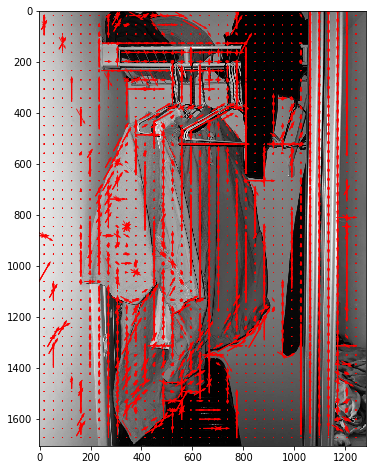

In [185]:
img_chosen_flash = cv2.imread('/content/drive/MyDrive/chosen_img_flash.jpg', cv2.IMREAD_GRAYSCALE)
hog2_chosen_flash = HOG_algorithm(img_chosen_flash, cell_size=36, threshold_value = 0.03, algorithm = 1)
plot_HOG(img_chosen_flash, hog2_chosen_flash, cell_size=36)
norm_hog_chosen_flash = normalized_hog(img_chosen_flash, hog2_chosen_flash)
plot_HOG(img_chosen_flash, norm_hog_chosen_flash, cell_size=36)
np.savetxt('/content/drive/MyDrive/chosen_img_flash.txt', norm_hog_chosen_flash.reshape(-1, ))


# Q4

In [187]:
def calculate_second_moment_matrix(img, sigma=6):
  img = cv2.GaussianBlur(img, (9, 9), 2)
  Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
  Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)
  H, W = img.shape[0], img.shape[1]
  M = np.zeros((H, W, 2, 2))

  M_0_0 = cv2.GaussianBlur(Ix**2, (7, 7), sigma)
  M_0_1 = cv2.GaussianBlur(Ix*Iy, (7, 7), sigma)
  M_1_0 = cv2.GaussianBlur(Iy*Ix, (7, 7), sigma)
  m_1_1 = cv2.GaussianBlur(Iy**2, (7, 7), sigma)

  M[:, :, 0, 0] = M_0_0
  M[:, :, 0, 1] = M_0_1
  M[:, :, 1, 0] = M_1_0
  M[:, :, 1, 1] = m_1_1

  return M

[]

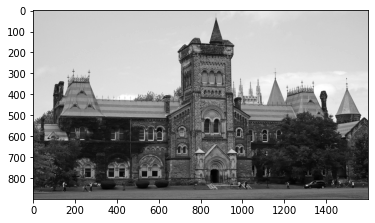

In [188]:
img_uoft =  cv2.imread('/content/drive/MyDrive/University_of_Toronto.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_uoft, cmap = 'gray')
plt.plot()

[]

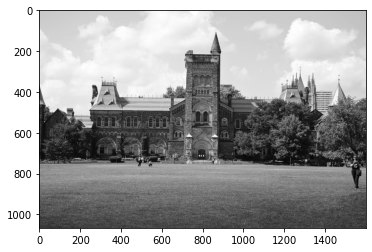

In [189]:
img_college =  cv2.imread('/content/drive/MyDrive/University_College.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_college, cmap = 'gray')
plt.plot()

Q4.1 + Q4.2

Calculate the eigenvalues + plot scatter points of two images

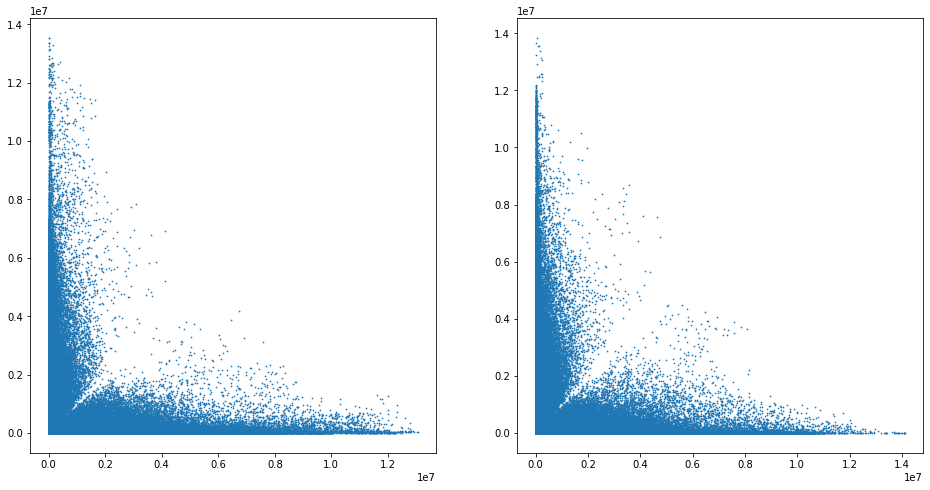

In [190]:
M1 = calculate_second_moment_matrix(img_uoft)
u1 = np.linalg.eig(M1)[0]
M2 = calculate_second_moment_matrix(img_college)
u2 = np.linalg.eig(M2)[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(u1[:, :, 0],u1[:, :, 1], s=0.5)
axes[1].scatter(u2[:, :, 0],u2[:, :, 1], s=0.5)
plt.show()

Q4.3 choose threshold values and do corner detection for both images

[]

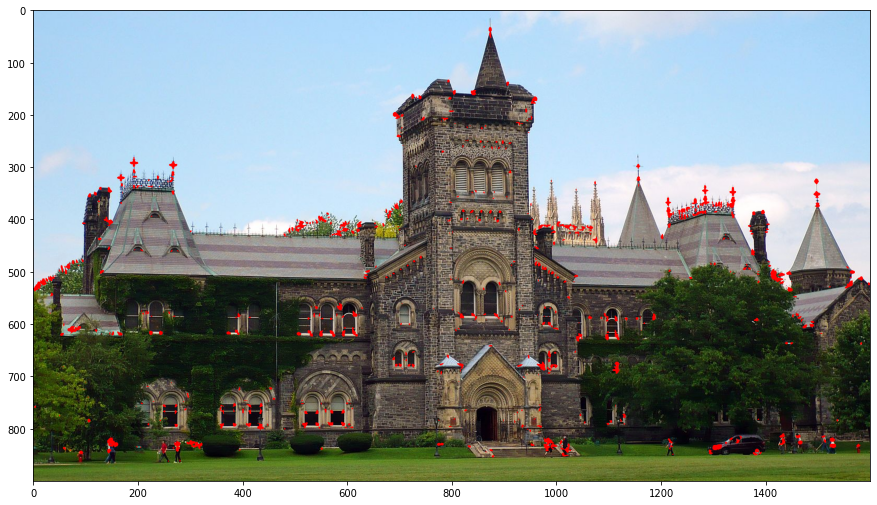

In [191]:
img_uoft_color = cv2.imread('/content/drive/MyDrive/University_of_Toronto.jpeg')
img_uoft_color = cv2.cvtColor(img_uoft_color, cv2.COLOR_BGR2RGB)
thres = 4e5
min_matrix = np.minimum(u1[:, :, 0], u1[:, :, 1])
img_uoft_color[min_matrix > thres] = [255, 0, 0]
plt.figure(figsize=(15, 13))
plt.imshow(img_uoft_color)
plt.plot()


[]

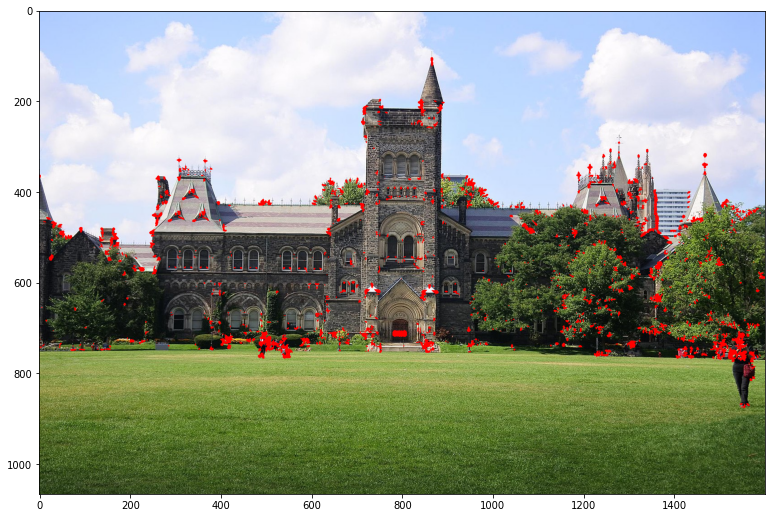

In [192]:
img_college_color = cv2.imread('/content/drive/MyDrive/University_College.jpeg')
img_college_color = cv2.cvtColor(img_college_color, cv2.COLOR_BGR2RGB)
thres = 3e5
min_matrix = np.minimum(u2[:, :, 0], u2[:, :, 1])
img_college_color[min_matrix > thres] = [255, 0, 0]
plt.figure(figsize=(13, 10))
plt.imshow(img_college_color)
plt.plot()

Q4.4  

choose a sigma significantly large( I use 60 which is 10 times) and repeat steap 123

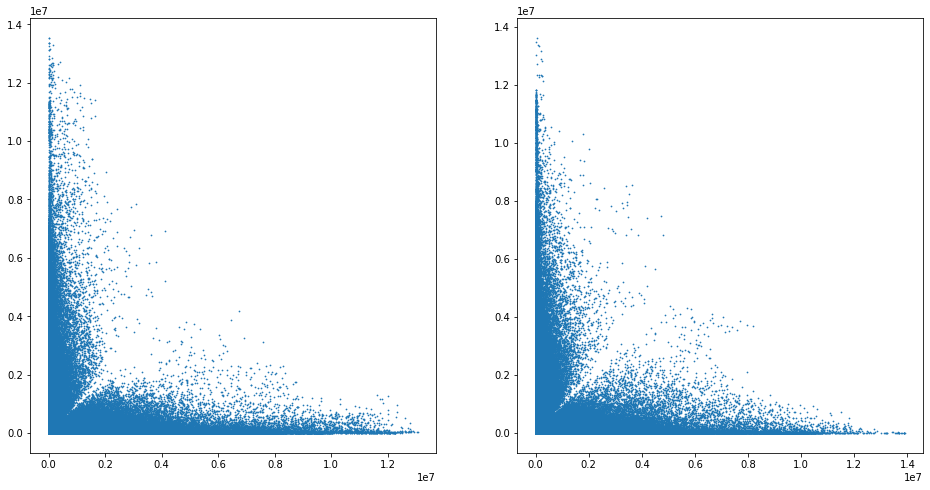

In [193]:
M1_ = calculate_second_moment_matrix(img_uoft, sigma=60)
u1 = np.linalg.eig(M1)[0]
M2 = calculate_second_moment_matrix(img_college, sigma=60)
u2 = np.linalg.eig(M2)[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(u1[:, :, 0],u1[:, :, 1], s=0.5)
axes[1].scatter(u2[:, :, 0],u2[:, :, 1], s=0.5)
plt.show()

[]

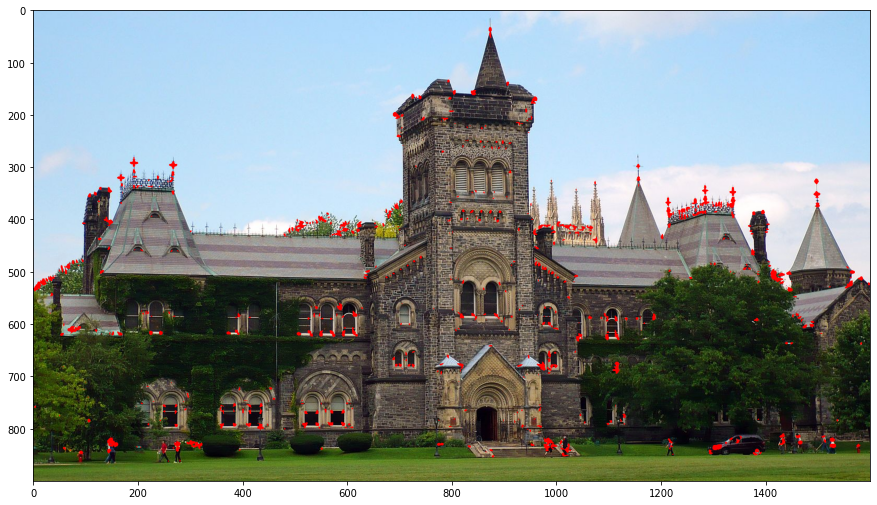

In [194]:
img_uoft_color = cv2.imread('/content/drive/MyDrive/University_of_Toronto.jpeg')
img_uoft_color = cv2.cvtColor(img_uoft_color, cv2.COLOR_BGR2RGB)
thres = 4e5
min_matrix = np.minimum(u1[:, :, 0], u1[:, :, 1])
img_uoft_color[min_matrix > thres] = [255, 0, 0]
plt.figure(figsize=(15, 13))
plt.imshow(img_uoft_color)
plt.plot()

[]

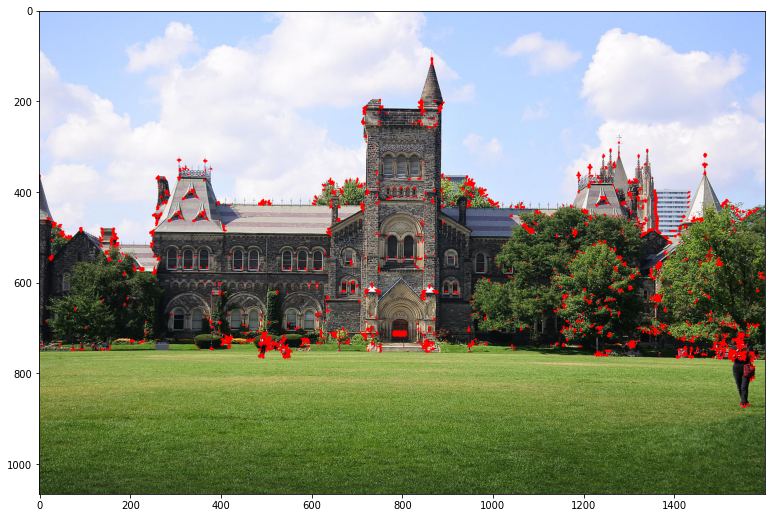

In [195]:
img_college_color = cv2.imread('/content/drive/MyDrive/University_College.jpeg')
img_college_color = cv2.cvtColor(img_college_color, cv2.COLOR_BGR2RGB)
thres = 3e5
min_matrix = np.minimum(u2[:, :, 0], u2[:, :, 1])
img_college_color[min_matrix > thres] = [255, 0, 0]
plt.figure(figsize=(13, 10))
plt.imshow(img_college_color)
plt.plot()